In [2]:
import pandas as pd
from scipy.stats import kstest, norm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp


In [3]:
job_df = pd.read_csv('/Users/ezequielesparza/Job_Statistics/data/job_data_clean.csv')

In [64]:
job_df.shape

(2228, 136)

Text(0.5, 1.0, 'Histogram of Standard Salaries')

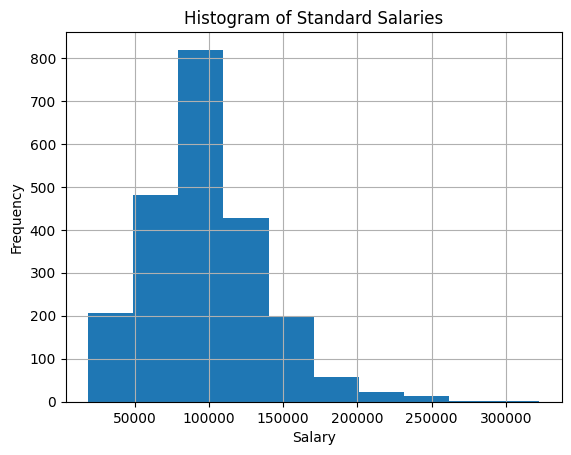

In [4]:
# Histograms salary_standardized

salary_standardized = job_df['salary_standardized']

salary_standardized.hist()

plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Histogram of Standard Salaries')

Text(0, 0.5, 'Salary')

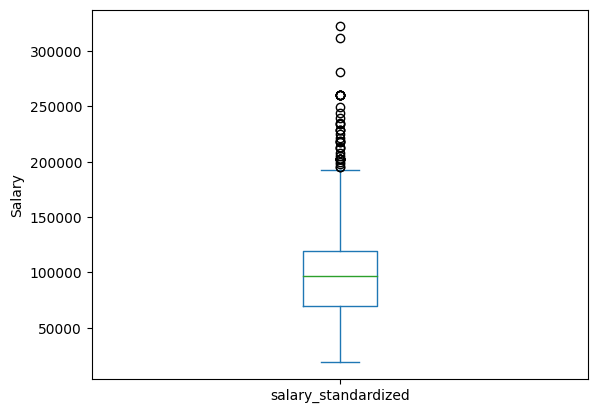

In [5]:
# BoxPlots for salary_standardized

salary_standardized.plot.box()
plt.ylabel('Salary')


Text(0, 0.5, 'Frequency')

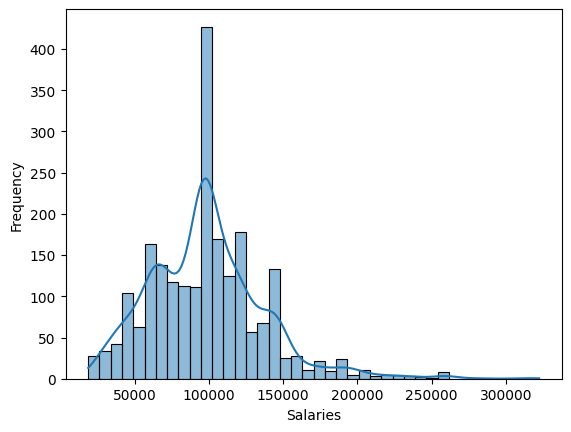

In [6]:
# KS Test on salary_standardized

statistic, p_value = kstest(salary_standardized, 'norm')
sns.histplot(data=salary_standardized, kde=True)

plt.xlabel('Salaries')
plt.ylabel('Frequency')



/var/folders/fy/fl5q9lyx5cl_4sqy67dvl7f80000gn/T/ipykernel_35829/4084996758.py:5: FutureWarning: ['title', 'company_name', 'location', 'via', 'extensions', 'posted_at', 'schedule_type', 'date_time', 'description_tokens', 'salary_pay', 'salary_rate'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  wfh_stats = wfh.agg(['mean','std','count'])


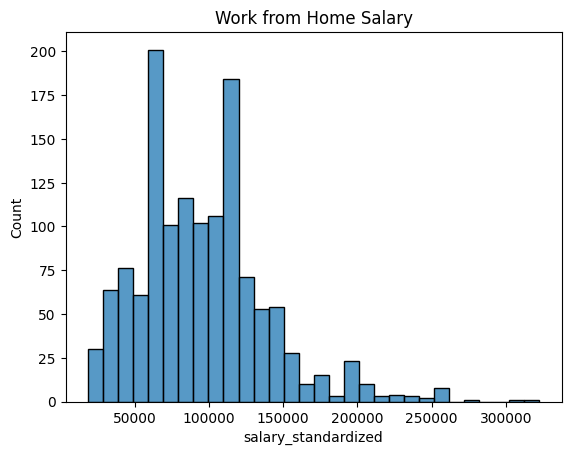

In [68]:
# work from home and salary histograms

wfh = job_df.groupby('work_from_home')

wfh_stats = wfh.agg(['mean','std','count'])

wfh_true = wfh.get_group(True)

ax = sns.histplot(wfh_true['salary_standardized'])
# add a title
ax.set_title('Work from Home Salary')

# display the plot
plt.show()

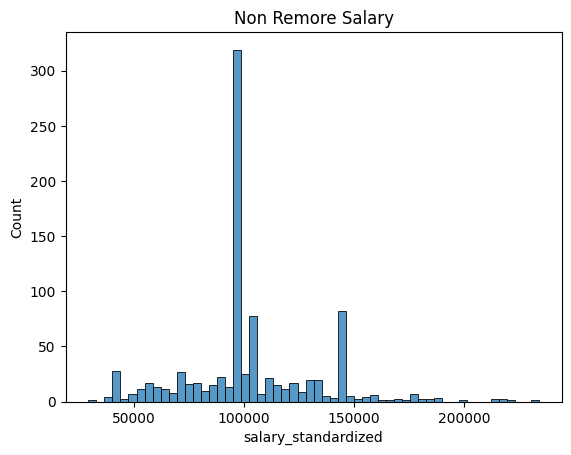

In [69]:
# NO work from home and salary histogram
ax = sns.histplot(wfh_false['salary_standardized'])
# add a title
ax.set_title('Non Remore Salary')

# display the plot
plt.show()

Text(0.5, 1.0, 'Remote Work Salary')

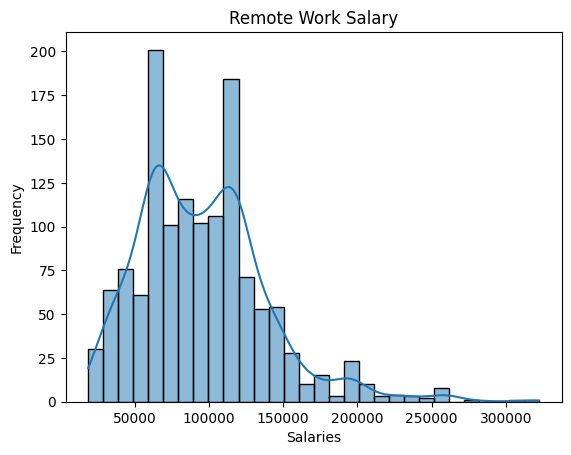

In [9]:
statistic, p_value = kstest(wfh_true['salary_standardized'], 'norm')
sns.histplot(data=wfh_true['salary_standardized'], kde=True)

plt.xlabel('Salaries')
plt.ylabel('Frequency')
plt.title('Remote Work Salary')

Text(0.5, 1.0, 'Non-Remote Salary')

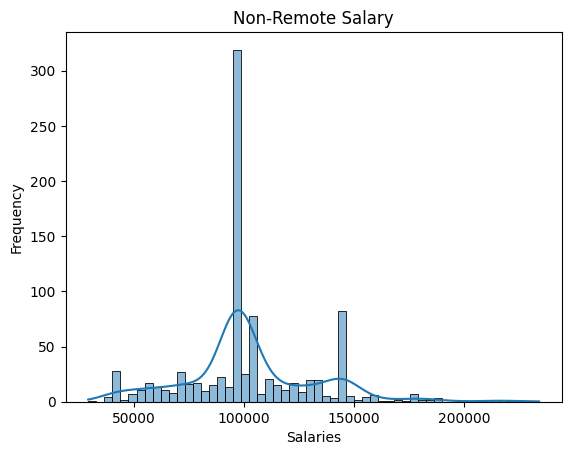

In [10]:
statistic, p_value = kstest(wfh_false['salary_standardized'], 'norm')
sns.histplot(data=wfh_false['salary_standardized'], kde=True)

plt.xlabel('Salaries')
plt.ylabel('Frequency')
plt.title('Non-Remote Salary')

P-value: 0.0


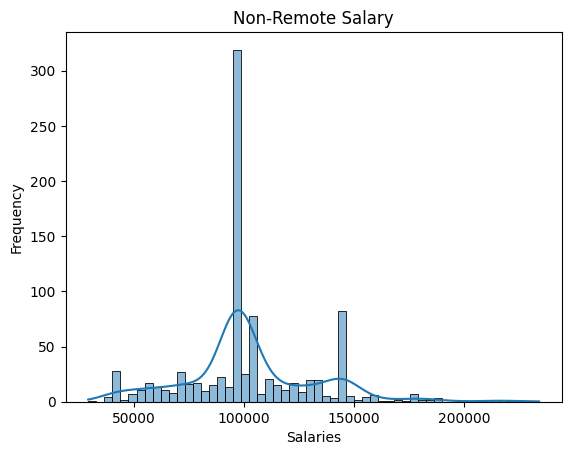

In [65]:
p_value = kstest(wfh_false['salary_standardized'], 'norm')[1]
print(f"P-value: {p_value}")

# visualize histogram
sns.histplot(data=wfh_false['salary_standardized'], kde=True)
plt.xlabel('Salaries')
plt.ylabel('Frequency')
plt.title('Non-Remote Salary')
plt.show()

In [11]:
# SKILLS
pd.set_option('display.max_columns', None)
job_df.head(2)

,id,title,company_name,location,via,extensions,posted_at,schedule_type,work_from_home,date_time,description_tokens,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,airflow,alteryx,apl,asp.net,assembly,atlassian,aurora,aws,azure,bash,bigquery,bitbucket,c,c++,c/c++,cobol,cognos,crystal,css,dart,dax,docker,dplyr,excel,fortran,gcp,gdpr,ggplot2,git,github,gitlab,go,golang,graphql,groovy,hadoop,html,java,javascript,jira,jquery,js,julia,jupyter,keras,linux,linux/unix,looker,matlab,matplotlib,microstrategy,mongo,mongodb,mssql,mysql,no-sql,node,node.js,nosql,nuix,numpy,outlook,pandas,perl,php,pl/sql,plotly,postgres,postgresql,power_bi,powerpoint,powerpoints,powershell,pyspark,python,pytorch,qlik,r,redis,redshift,rshiny,ruby,rust,sap,sas,scala,scikit-learn,seaborn,selenium,sharepoint,shell,snowflake,solidity,spark,splunk,spreadsheet,spss,sql,ssis,ssrs,swift,t-sql,tableau,tensorflow,terminal,tidyr,twilio,typescript,unix,unix/linux,vb.net,vba,visio,visual_basic,vue,vue.js,word
0,2,Legal Data Analyst,DISYS,United States,via Indeed,"['4 hours ago', '21 to 23 an hour', 'Contractor']",4 hours ago,Contractor,False,00:10.1,[],21 to 23,an hour,22.0,21.0,23.0,22.0,NaN,45760.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,11,Lead Data Analyst,Laka & Company,"Bentonville, AR",via LinkedIn,"['10 hours ago', '100K to 140K a year', 'Full-...",10 hours ago,Full-time,False,00:12.6,"['c', 'ssrs', 'sql', 'ssis', 'python', 'azure']",100K to 140K,a year,120000.0,100000.0,140000.0,NaN,120000.0,120000.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
skills = job_df.loc[:, 'airflow':'word']

skills.head()

,airflow,alteryx,apl,asp.net,assembly,atlassian,aurora,aws,azure,bash,bigquery,bitbucket,c,c++,c/c++,cobol,cognos,crystal,css,dart,dax,docker,dplyr,excel,fortran,gcp,gdpr,ggplot2,git,github,gitlab,go,golang,graphql,groovy,hadoop,html,java,javascript,jira,jquery,js,julia,jupyter,keras,linux,linux/unix,looker,matlab,matplotlib,microstrategy,mongo,mongodb,mssql,mysql,no-sql,node,node.js,nosql,nuix,numpy,outlook,pandas,perl,php,pl/sql,plotly,postgres,postgresql,power_bi,powerpoint,powerpoints,powershell,pyspark,python,pytorch,qlik,r,redis,redshift,rshiny,ruby,rust,sap,sas,scala,scikit-learn,seaborn,selenium,sharepoint,shell,snowflake,solidity,spark,splunk,spreadsheet,spss,sql,ssis,ssrs,swift,t-sql,tableau,tensorflow,terminal,tidyr,twilio,typescript,unix,unix/linux,vb.net,vba,visio,visual_basic,vue,vue.js,word
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
# most sought after skill 
skill_freq = skills.sum(axis=0)
sorted_skills = skill_freq.sort_values(ascending=False)
print("Top 10 most sought-after skills for data analyst positions:")
print(sorted_skills[:10])

Top 10 most sought-after skills for data analyst positions:
sql              1135
tableau           731
excel             724
python            448
power_bi          407
microstrategy     310
r                 302
jira              235
powerpoint        191
sas               180
dtype: int64


In [48]:
# hiring most DA

top_cities = job_df['location'].value_counts().head(10)
print(top_cities)

Anywhere              1331
United States          349
Wichita, KS             20
Maize, KS               19
Tulsa, OK               19
Missouri                15
Oklahoma City, OK       14
Jefferson City, MO      13
Kansas City, MO         13
Haysville, KS           12
Name: location, dtype: int64


In [75]:
# top companies

top_companies = job_df['company_name'].value_counts().nlargest(5)
print(top_companies)

Upwork                741
Cox Communications    321
EDWARD JONES          121
Insight Global         69
Harnham                64
Name: company_name, dtype: int64


In [18]:
# remote vs non remote

remote_mean = wfh_true['salary_standardized'].mean()
non_remote_mean = wfh_false['salary_standardized'].mean()
difference = remote_mean - non_remote_mean
print(f"The average salary for remote work is ${remote_mean:.2f}")
print(f"The average salary for non-remote work is ${non_remote_mean:.2f}")
print(f"The difference in salary is ${difference:.2f}")

The average salary for remote work is $95637.39
The average salary for non-remote work is $102173.12
The difference in salary is $-6535.74


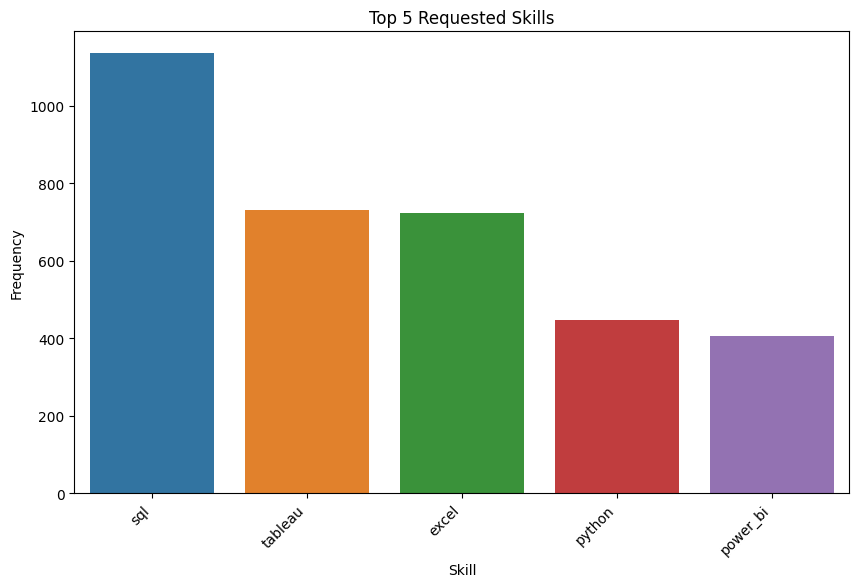

In [70]:
# top 5 skills viz
top_skills = skills.sum().sort_values(ascending=False)[:5]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_skills.index, y=top_skills.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Skill')
plt.ylabel('Frequency')
plt.title('Top 5 Requested Skills')
plt.show()

/var/folders/fy/fl5q9lyx5cl_4sqy67dvl7f80000gn/T/ipykernel_35829/2534919106.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(job_df.loc[job_df['sql'] == 1, 'salary_standardized'])


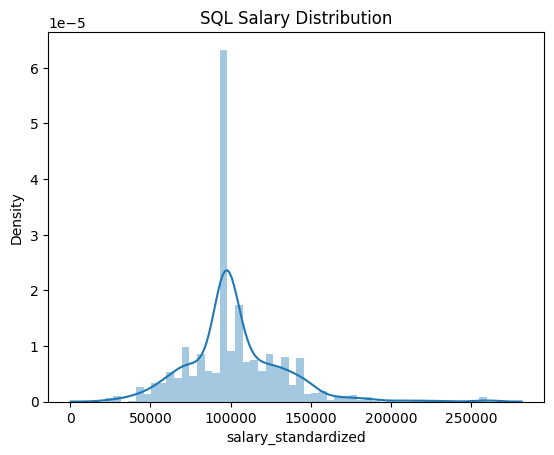

In [72]:
# sql positions 
sns.distplot(job_df.loc[job_df['sql'] == 1, 'salary_standardized'])
plt.title('SQL Salary Distribution')
plt.show()


/var/folders/fy/fl5q9lyx5cl_4sqy67dvl7f80000gn/T/ipykernel_35829/3029606983.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(job_df.loc[job_df['python'] == 1, 'salary_standardized'])


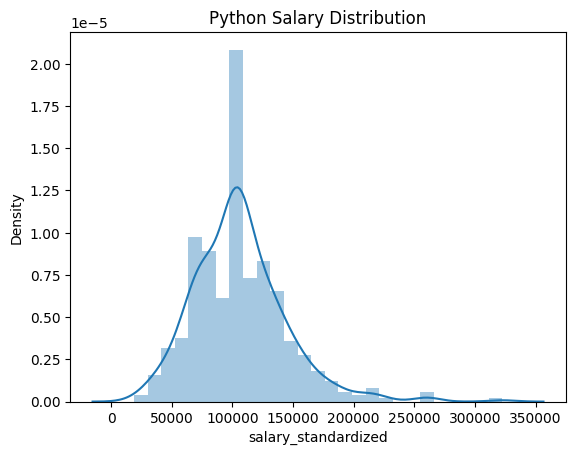

In [71]:
# python salary 

sns.distplot(job_df.loc[job_df['python'] == 1, 'salary_standardized'])
plt.title('Python Salary Distribution')
plt.show()

/var/folders/fy/fl5q9lyx5cl_4sqy67dvl7f80000gn/T/ipykernel_35829/3444630067.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(job_df.loc[job_df['tableau'] == 1, 'salary_standardized'])


<AxesSubplot: xlabel='salary_standardized', ylabel='Density'>

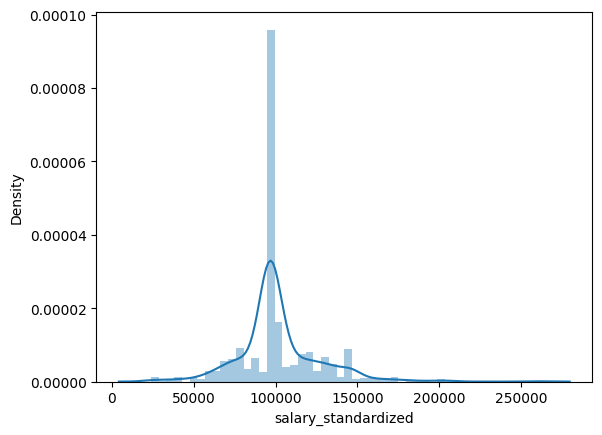

In [30]:
# tableau salary

sns.distplot(job_df.loc[job_df['tableau'] == 1, 'salary_standardized'])

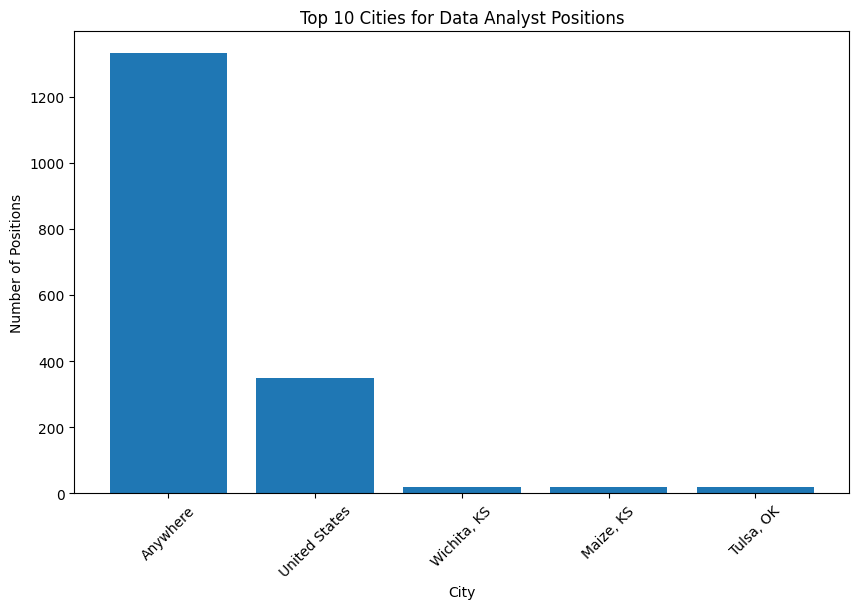

In [34]:
# top cities

plt.figure(figsize=(10, 6))
plt.bar(top_cities.index, top_cities.values)
plt.title('Top 10 Cities for Data Analyst Positions')
plt.xlabel('City')
plt.ylabel('Number of Positions')
plt.xticks(rotation=45)
plt.show()

In [46]:
# NO LA DATA
# NO NY DATA
# NO ATLANTA DATA


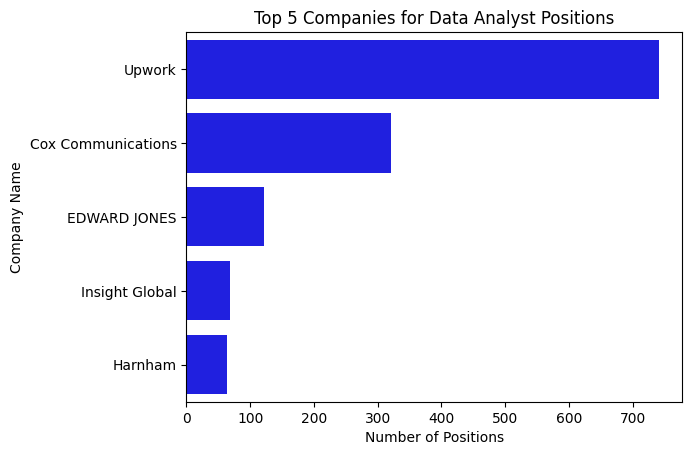

In [76]:
# top companies

sns.barplot(x=top_companies.values, y=top_companies.index, color='blue')

# Set plot title and axis labels
plt.title('Top 5 Companies for Data Analyst Positions')
plt.xlabel('Number of Positions')
plt.ylabel('Company Name')

# Display the plot
plt.show()

In [53]:
unique_company_names = job_df['company_name'].unique()
print(unique_company_names)

['DISYS' 'Laka & Company' 'Educated Solutions Corp' 'Pediatrics Northwest'
 'Citi' 'Actalent' 'Eurofins' 'Diaconia LLC' 'EDWARD JONES' 'Edward Jones'
 'CBL Solutions' 'The Judge Group' 'Vaco Technology'
 'Captivation Software' 'Wilbert Funeral Services'
 'Acadia Technologies, Inc.' 'SnapDragon Associates, LLC'
 'NYC Department of Social Services' 'Genuent' 'CRG' 'Village Care' 'SMCI'
 'Nuna Inc.' 'Imperium Data' 'Humans Doing' 'Mavensoft Technologies, LLC.'
 'RLA Engineering, LLC' 'Foundation for California Community Colleges'
 'California ISO' 'Upwork' 'ATRILOGY' 'Applicantz' 'TechTrueUP'
 'American Auto Shield' 'GForce Life Sciences'
 'Planned Parenthood of Greater Ohio'
 'Avani Tech Solutions Private Limited'
 'Northrop Grumman Federal Credit Union' 'Insight Global' 'Apex Systems'
 'Zeektek' 'counseling & recovery services of oklahoma'
 'Cox Communications' 'Harnham' 'Estí©e Lauder Companies' 'Staples'
 'Icomply Consulting Inc' 'iTrending Solutions' 'AmmaluIT' 'LPX Group'
 'Commonwe

/var/folders/fy/fl5q9lyx5cl_4sqy67dvl7f80000gn/T/ipykernel_35829/447966875.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(job_df.loc[job_df['company_name'] == company, 'salary_standardized'], ax=axs[i])
/var/folders/fy/fl5q9lyx5cl_4sqy67dvl7f80000gn/T/ipykernel_35829/447966875.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147e

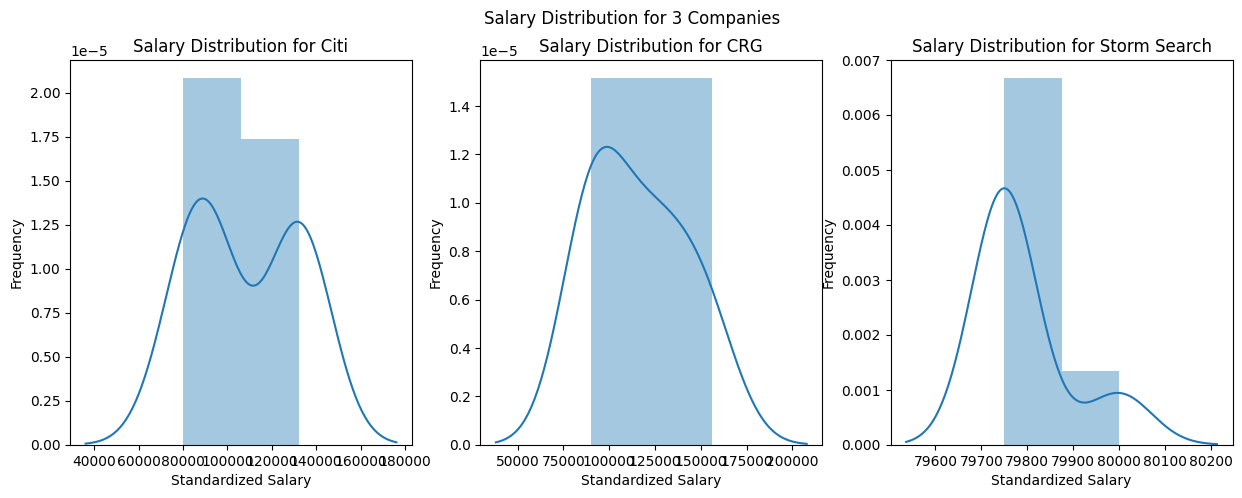

In [61]:
import seaborn as sns

# Create a list of the companies you want to analyze
companies = ['Citi', 'CRG', 'Storm Search']

# Create subplots for each company
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# Loop through each company and create a distribution plot
for i, company in enumerate(companies):
    sns.distplot(job_df.loc[job_df['company_name'] == company, 'salary_standardized'], ax=axs[i])
    axs[i].set_title(f'Salary Distribution for {company}')
    axs[i].set_xlabel('Standardized Salary')
    axs[i].set_ylabel('Frequency')

# Add a main title to the figure
fig.suptitle('Salary Distribution for 3 Companies')



# Show the plot
plt.show()


In [66]:
top_cities

Anywhere              1331
United States          349
Wichita, KS             20
Maize, KS               19
Tulsa, OK               19
Missouri                15
Oklahoma City, OK       14
Jefferson City, MO      13
Kansas City, MO         13
Haysville, KS           12
Name: location, dtype: int64